In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [5]:
daten = pd.DataFrame({
    'Jahr': np.arange(2000, 2021),
    'Mietindex': [90, 91.2, 92.1, 93.0, 94.5, 96.0, 97.2, 98.5, 99.5, 101.0, 102.5, 103.2, 104.0, 105.3, 106.5, 107.2, 108.0, 108.8, 109.2, 109.7, 110.1],
    'Inflation': [0.8, 1.0, 0.5, 0.3, 0.6, 1.2, 0.9, 0.4, -0.1, 0.3, 0.7, -0.5, -0.7, 0.1, 0.4, -0.2, -0.5, 0.6, 0.2, 0.4, 0.8]
})

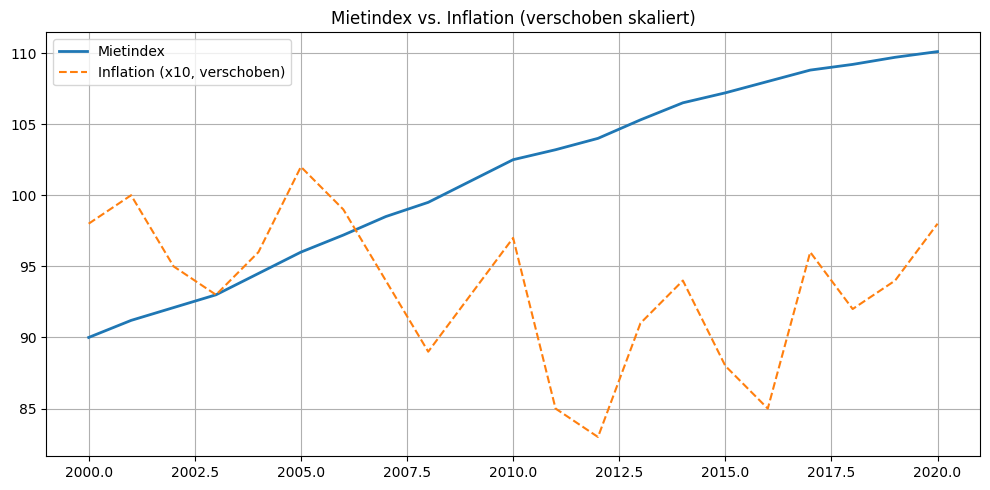

In [6]:
# Visualisierung der Zeitreihen
plt.figure(figsize=(10,5))
plt.plot(daten['Jahr'], daten['Mietindex'], label='Mietindex', linewidth=2)
plt.plot(daten['Jahr'], daten['Inflation']*10 + 90, label='Inflation (x10, verschoben)', linestyle='--')
plt.title('Mietindex vs. Inflation (verschoben skaliert)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Pearson-Korrelation
corr, p_value = pearsonr(daten['Mietindex'], daten['Inflation'])
print(f"Pearson-Korrelation: {corr:.3f}, p-Wert: {p_value:.4f}")

# %%
# Regressionsanalyse mit Lag (ein Jahr Verzögerung)
daten['Inflation_lag1'] = daten['Inflation'].shift(1)
daten_lag = daten.dropna()

X = daten_lag[['Inflation_lag1']].values
y = daten_lag['Mietindex'].values
modell = LinearRegression()
modell.fit(X, y)

print(f"Regressionskoeffizient (Lag 1): {modell.coef_[0]:.3f}, Intercept: {modell.intercept_:.3f}")


Pearson-Korrelation: -0.424, p-Wert: 0.0551
Regressionskoeffizient (Lag 1): -6.570, Intercept: 103.977


In [8]:
# Granger-Kausalitätstest (max. 2 Lags)
granger_input = daten[['Mietindex', 'Inflation']].dropna()
granger_result = grangercausalitytests(granger_input, maxlag=2, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2291  , p=0.0554  , df_denom=17, df_num=1
ssr based chi2 test:   chi2=4.9755  , p=0.0257  , df=1
likelihood ratio test: chi2=4.4432  , p=0.0350  , df=1
parameter F test:         F=4.2291  , p=0.0554  , df_denom=17, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.7715  , p=0.0149  , df_denom=14, df_num=2
ssr based chi2 test:   chi2=15.6656 , p=0.0004  , df=2
likelihood ratio test: chi2=11.4249 , p=0.0033  , df=2
parameter F test:         F=5.7715  , p=0.0149  , df_denom=14, df_num=2


C:\Users\Lino\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
